<div class="markdown-google-sans">
  <h1>Importando as bibliotecas</h1>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

<div class="markdown-google-sans">
  <h1>Questão 1</h1>
</div>

Faça uma estimativa do logaritmo de 10 na base 10 (log 10 ) usando interpolação
linear.

Para cada interpolação, calcule o erro relativo percentual baseado no valor
verdadeiro.

In [207]:
'''implementar a interpolação junto a lógica do método 
Gaus-Jordan para resolver o Sistema Linear'''

def interpolacao(Pontos,**kwargs):
    #X é a matriz com os valores dos pontos 
    #Pontos[:,0]=x e Pontos[:,1]=f(x) 
    
    # Defini o grau da interpolação, 
    # Senão for passado grau faz por padrão para grau 2.
    grau = kwargs.get('grau', 2) 

    # Defini o ponto inicial para interpolar, 
    # Senão for passado inicio começa do 0.
    inicio = kwargs.get('inicio', 0)

    
    A = np.copy(Pontos[:,0])
    Bc = np.copy(Pontos[:,1])
    Bc = np.resize(Bc,(len(Bc),1)) #Redimenzinando para vetor coluna
    
    #Coloca na matriz AC a matriz de vandermond(matriz de potências)
    Ac = np.zeros([len(A)-inicio,grau],dtype='float')
    for i in range(0,len(A)):
        for j in range(0,grau):
            Ac[j,i] = A[j]**i
            
    #Lógica do Gauss-Jordan        
    for i in range(0,len(Ac)):
        pivo = Ac[i,i]
        Ac[i,:] = Ac[i,:]/pivo
        Bc[i] = Bc[i]/pivo
        for j in range(0,len(Ac)):
            if j!=i:
                m = Ac[j,i]
                Ac[j,:] = Ac[j,:] - m*Ac[i,:]
                Bc[j] = Bc[j] - m*Bc[i]
                
    return Bc #Retorna o vetor de coeficientes para o polinômio

<div class="markdown-google-sans">
  <h2>Item a)</h2>
</div>

interpole entre: 
- log(8)(10) = 0.9030900
- log(12)(10) = 1.0791812

In [201]:
npontos = int(input('Quantos pontos você está usando?:'))

Quantos pontos você está usando?: 2


In [204]:
pontos1a = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos1a[i,j] = float(input(f'Digite o valor do x{j}:'))
        elif j == 1:
            pontos1a[i,j] = float(input(f'Digite o valor de fx{j}:'))
print(f'\nxi:{pontos1a[:,0]}\n')
print(f'yi:{pontos1a[:,1]}')    

Digite o valor do x0: 8
Digite o valor do x0: 12
Digite o valor de fx1: 0.9030900
Digite o valor de fx1: 1.0791812



xi:[ 8. 12.]

yi:[0.90309   1.0791812]


In [208]:
coef = interpolacao(pontos1a)
print('Coeficientes do polinomio interpolador')
print(coef)

Coeficientes do polinomio interpolador
[[0.5509076]
 [0.0440228]]


In [209]:
valor_est = 0 #Valor estimado
for i in range (0,2): #2 por causa que é interpolação linear
    valor_est += coef[i]*(10**i)
print(f'Valor de log(10)(10) pela interpolação linear:{valor_est}')

Valor de log(10)(10) pela interpolação linear:[0.9911356]


In [210]:
valor_esp = math.log(10,10)
erro_rel = abs(valor_esp - valor_est)/abs(valor_esp)
print(f'Erro relativo percentual:{erro_rel*100}%')

Erro relativo percentual:[0.88644]%


<div class="markdown-google-sans">
  <h2>Item b)</h2>
</div>

interpole entre: 
- log(9)(10) = 0.9542425
- log(11)(10) = 1.0431927

In [212]:
pontos1b = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos1b[i,j] = float(input(f'Digite o valor do x{j}:'))
        elif j == 1:
            pontos1b[i,j] = float(input(f'Digite o valor de fx{j}:'))
print(f'\nxi:{pontos1b[:,0]}\n')
print(f'yi:{pontos1b[:,1]}')    

Digite o valor do x0: 9
Digite o valor do x0: 11
Digite o valor de fx1: 0.9542425
Digite o valor de fx1: 1.0431927



xi:[ 9. 11.]

yi:[0.9542425 1.0431927]


In [213]:
coef = interpolacao(pontos_1b)
print('Coeficientes do polinomio interpolador')
print(coef)

Coeficientes do polinomio interpolador
[[0.5539666]
 [0.0444751]]


In [214]:
valor_est = 0 #Valor estimado
for i in range (0,2): #2 por causa que é interpolação linear
    valor_est += coef[i]*(10**i)
print(f'Valor de log(10)(10) pela interpolação linear:{valor_est}')

Valor de log(10)(10) pela interpolação linear:[0.9987176]


In [215]:
valor_esp = math.log(10,10)
erro_rel = abs(valor_esp - valor_est)/abs(valor_esp)
print(f'Erro relativo percentual:{erro_rel*100}%')

Erro relativo percentual:[0.12824]%


<div class="markdown-google-sans">
  <h1>Questão 2</h1>
</div>

Ajuste um <strong>polinômio interpolador de Newton de segundo grau</strong> para fazer uma
estimativa de log(10)(10), usando os dados do problema anterior em x = 8, 9, 11.

Calcule o erro relativo percentual verdadeiro.

In [28]:
npontos = int(input('Quantos pontos você está usando?:'))

Quantos pontos você está usando?: 3


In [30]:
pontos2 = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos2[i,j] = float(input(f'Digite o valor do x{i}:'))
        elif j == 1:
            pontos2[i,j] = float(input(f'Digite o valor de fx{i}:'))
print(f'\nxi:{pontos2[:,0]}\n')
print(f'yi:{pontos2[:,1)}')

Digite o valor do x0: 8
Digite o valor do x1: 9
Digite o valor do x2: 11
Digite o valor de fx0: 0.9030900
Digite o valor de fx1: 0.9542425
Digite o valor de fx2: 1.0431927


[[ 8.         0.90309  ]
 [ 9.         0.9542425]
 [11.         1.0431927]]


In [216]:
def matriz_newton(P): 
    #P matriz dos pontos
    # P[:,0] = x
    # P[:,1] = fx
    
    [nlinhas,ncolunas] = P.shape
    
    #M vai ser a matriz com as diferenças divididas
    M = np.zeros([nlinhas,nlinhas+1],dtype='float')
    M[:,0] = P[:,0]
    M[:,1] = P[:,1]
    
    #Variável para controlar os x da divisão
    passo = 1
    
    [mlinhas,mcolunas] = M.shape
    
    for j in range(1,mcolunas-1):
        for i in range(0,mlinhas-1):
            if i+passo < mlinhas:
                div = M[i+passo][0] - M[i][0]
                dif = M[i+1][j]- M[i][j]
                M[i][j+1] = dif/div
        passo = passo + 1
    return M

In [217]:
mat = matriz_newton(pontos2)
print('Matriz de Newton (Diferença Dividas):')
print(mat)

Matriz de Newton (Diferença Dividas):
[[ 8.0000000e+00  9.0309000e-01  5.1152500e-02 -2.2258000e-03]
 [ 9.0000000e+00  9.5424250e-01  4.4475100e-02  0.0000000e+00]
 [ 1.1000000e+01  1.0431927e+00  0.0000000e+00  0.0000000e+00]]


In [218]:
def polinomio_newton(mat,valor,**kwargs):
    '''Interpola o polinomio de Newton com 
    a matriz das diferenças dividas'''
    
    # Defini o grau da interpolação.  
    # Senão for passado o grau faz por padrão para 2 Ordem.
    grau = kwargs.get('grau', 2)

    #+2 para poder ter a coluna certa na matriz
    coluna_grau = grau+2
    
    # Defini o ponto inicial para interpolar, 
    # Senão for passado inicio começa do 0.
    inicio = kwargs.get('inicio', 0)
        
    i = inicio
    soma = 0
    for j in range(1,coluna_grau):
        #Produtorio para a logica de interpolação de Newton
        produto = 1
        if j == 1:
            soma += mat[i][j]
        else:
            for k in range(0,j):
                produto = (valor-mat[k][0]) * produto
            soma += produto*mat[i][j]
    return soma

In [219]:
valor_est = polinomio_newton(mat,10)
print(f'Valor de log(10)(10) pela interpolação Newton 2 grau:\n{valor_est}')

Valor de log(10)(10) pela interpolação Newton 2 grau:
1.0098466


In [220]:
val_esp = math.log(10,10)
erro_rel = abs(valor_esp - valor_est)/abs(valor_esp)
print(f'Erro relativo percentual:{erro_rel*100}%')

Erro relativo percentual:0.9846599999999928%


<div class="markdown-google-sans">
  <h1>Questão 3</h1>
</div>

|  x  | 1,6 |  2  | 2,5 | 3,2 |  4  | 4,5 |
|-----|-----|-----|-----|-----|-----|-----|
| f(x)|  2  |  8  | 14  | 15  |  8  |  2  |


In [58]:
npontos = int(input('Quantos pontos vai ser utilizado?:'))

Quantos pontos vai ser utilizado?: 6


In [73]:
pontos3 = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos3[i,j] = float(input(f'Digite o valor do x{i}:'))
        elif j == 1:
            pontos3[i,j] = float(input(f'Digite o valor de fx{i}:'))
print(f'\nxi:{pontos3[:,0]}\n')
print(f'yi:{pontos3[:,1]}')

Digite o valor do x0: 1.6
Digite o valor do x1: 2
Digite o valor do x2: 2.5
Digite o valor do x3: 3.2
Digite o valor do x4: 4
Digite o valor do x5: 4.5
Digite o valor de fx0: 2
Digite o valor de fx1: 8
Digite o valor de fx2: 14
Digite o valor de fx3: 15
Digite o valor de fx4: 8
Digite o valor de fx5: 2



xi:[1.6 2.  2.5 3.2 4.  4.5]

yi:[ 2.  8. 14. 15.  8.  2.]


In [221]:
mat = matriz_newton(pontos3)
print('Matriz de Newton (Diferença Dividas):')
print(mat)

Matriz de Newton (Diferença Dividas):
[[  1.6          2.          15.          -3.33333333  -3.42261905
    1.84771825  -0.48115079]
 [  2.           8.          12.          -8.80952381   1.01190476
    0.45238095   0.        ]
 [  2.5         14.           1.42857143  -6.78571429   2.14285714
    0.           0.        ]
 [  3.2         15.          -8.75        -2.5          0.
    0.           0.        ]
 [  4.           8.         -12.           0.           0.
    0.           0.        ]
 [  4.5          2.           0.           0.           0.
    0.           0.        ]]


<div class="markdown-google-sans">
  <h2>Item a)</h2>
</div>

Calcule f(2,8) usando polinômios interpoladores de Newton de primeiro a terceiro
graus. Escolha a sequência de pontos para fazer sua estimativa de modo a atingir
a melhor acurácia possível.

<div class="markdown-google-sans">
  <h3>Primeira Ordem</h3>
</div>

vou começar pelo ponto 2.5 pois está mais próximo de 2.8, logo inicio = 2, pois 2 é o número da posição do 2.5 no vetor.

In [222]:
valor1 = polinomio_newton(mat,2.8,grau=1,inicio=2)
print(f'f(2.8) começando por {pontos3[2,0]}:\n{valor1}')

f(2.8) começando por 2.5:
15.37142857142857


<div class="markdown-google-sans">
  <h3>Segunda Ordem</h3>
</div>

In [223]:
valor2 = polinomio_newton(mat,2.8,grau=2,inicio=1)
print(f'f(2.8) começando por {pontos3[1,0]}:\n{valor2}')

f(2.8) começando por 2.0:
16.982857142857142


<div class="markdown-google-sans">
  <h3>Terceira Ordem</h3>
</div>

In [224]:
valor3 = polinomio_newton(mat,2.8,grau=3,inicio=1)
print(f'f(2.8) começando por {pontos3[1,0]}:\n{valor3}')

f(2.8) começando por 2.0:
16.866285714285713


<div class="markdown-google-sans">
  <h2>Item b)</h2>
</div>

Utilize a equação Rn = f n+1 (x) − f n (x) para fazer uma estimativa do erro em
cada previsão.

<div class="markdown-google-sans">
  <h3>Erro Primeira Ordem</h3>
</div>

In [225]:
print(f'R1 = {abs(valor2-valor1)}') 

R1 = 1.611428571428572


<div class="markdown-google-sans">
  <h3>Erro Segunda Ordem</h3>
</div>

In [226]:
print(f'R2 = {abs(valor3-valor2)}') 

R2 = 0.11657142857142944


<div class="markdown-google-sans">
  <h3>Erro Terceira Ordem</h3>
</div>

In [227]:
valor4 = polinomio_newton(mat,2.8,grau=4,inicio=1)
print(f'R3 = {abs(valor4-valor3)}') 

R3 = 0.06253714285714196


<div class="markdown-google-sans">
  <h1>Questão 4</h1>
</div>

|  x  | 1   |  2  | 3   | 5   |  7  | 8   |
|-----|-----|-----|-----|-----|-----|-----|
| f(x)|  3  |  6  | 19  | 99  |  291| 444 |

Calcule f(4) usando polinômios interpoladores de Newton de primeiro a quarto graus.
Escolha seus pontos base para obter uma boa acurácia. O que seus resultados indicam em
relação ao grau do polinômio usado para gerar os resultados da tabela?

In [232]:
npontos = int(input('Quantos pontos vai ser utilizado?:'))

Quantos pontos vai ser utilizado?: 6


In [90]:
pontos4 = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos4[i,j] = float(input(f'Digite o valor do x{i}:'))
        elif j == 1:
            pontos4[i,j] = float(input(f'Digite o valor de fx{i}:'))
print(f'\nxi:{pontos4[:,0]}\n')
print(f'yi:{pontos4[:,1]}')

Digite o valor do x0: 1
Digite o valor do x1: 2
Digite o valor do x2: 3
Digite o valor do x3: 5
Digite o valor do x4: 7
Digite o valor do x5: 8
Digite o valor de fx0: 3
Digite o valor de fx1: 6
Digite o valor de fx2: 19
Digite o valor de fx3: 99
Digite o valor de fx4: 291
Digite o valor de fx5: 444



xi:[1. 2. 3. 5. 7. 8.]

yi:[  3.   6.  19.  99. 291. 444.]


In [231]:
mat = matriz_newton(pontos4)
print('Matriz de Newton (Diferença Dividas):')
print(mat)

Matriz de Newton (Diferença Dividas):
[[  1.   3.   3.   5.   1.   0.   0.]
 [  2.   6.  13.   9.   1.   0.   0.]
 [  3.  19.  40.  14.   1.   0.   0.]
 [  5.  99.  96.  19.   0.   0.   0.]
 [  7. 291. 153.   0.   0.   0.   0.]
 [  8. 444.   0.   0.   0.   0.   0.]]


In [235]:
def plotar_newton(mat):
    xx=np.linspace(min(mat[:,0]),max(mat[:,0]),1000)
    yy=[]
    for x in xx:
        soma=mat[0,1]
        k=1
        z=0
        p=1
        while k < npontos:
        
            while z < k:
                p=p*(x-mat[z,0])   
                z=z+1
            soma=soma+p*mat[0,k+1] 
            k=k+1
        yy.append(soma)  
    plt.plot(xx, yy, label="Polinomio Interpolador")
    plt.plot(mat[:,0], mat[:,1], 'o', label="Pontos dados")
    plt.plot(4, 51, 'o', label="Pontos dados")
    

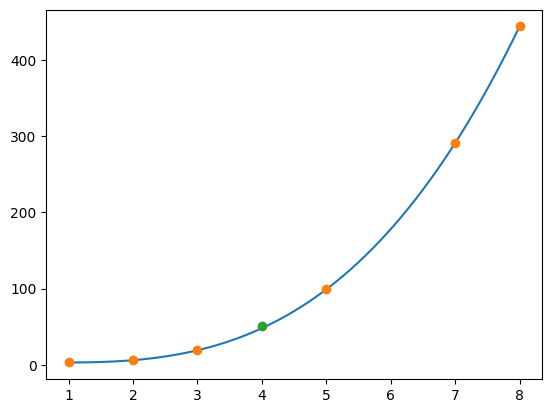

In [236]:
plotar_newton(mat)

<div class="markdown-google-sans">
  <h2>Primeiro grau</h2>
</div>

In [237]:
valor1 = polinomio_newton(mat,4,grau=1,inicio=1)
print(f'f(4) começando por {pontos4[1,0]}:\n{valor1}')

f(4) começando por 2.0:
84.0


<div class="markdown-google-sans">
  <h2>Segundo grau</h2>
</div>

In [238]:
valor2 = polinomio_newton(mat,4,grau=2,inicio=0)
print(f'f(4) começando por {pontos4[0,0]}:\n{valor2}')

f(4) começando por 1.0:
51.0


<div class="markdown-google-sans">
  <h2>Terceiro grau</h2>
</div>

In [239]:
valor3 = polinomio_newton(mat,4,grau=3,inicio=0)
print(f'f(4) começando por {pontos4[0,0]}:\n{valor3}')

f(4) começando por 1.0:
45.0


<div class="markdown-google-sans">
  <h2>Quarto grau</h2>
</div>

In [240]:
valor4 = polinomio_newton(mat,4,grau=4,inicio=0)
print(f'f(4) começando por {pontos4[0,0]}:\n{valor4}')

f(4) começando por 1.0:
45.0


<div class="markdown-google-sans">
  <h1>Questão 5</h1>
</div>

Repita os problemas 1 a 4, usando polinômios de Lagrange. Nas questões 3 e 4,
use polinômios de Lagrange de primeiro a terceiro graus.

In [269]:
def lagrange(A, x, **kwargs):
    grau = kwargs.get('grau', len(A)-1)  # Usa grau diretamente se fornecido, senão usa o número de pontos

    inicio = kwargs.get('inicio', 0)

    if not isinstance(grau, int) or grau < 1 or inicio < 0 or inicio >= len(A):
        raise ValueError("Os argumentos grau e inicio devem ser inteiros válidos.")

    k = inicio
    soma = 0
    
    if k + grau > len(A):
        raise ValueError("A soma de k e grau não deve ultrapassar o comprimento de A.")
    
    for i in range(k, grau + k+1):  # Começa a partir do valor de k e limita o loop ao número correto de iterações
        l = 1
        for j in range(k, grau + k+1):  # Começa a partir do valor de k
            if j != i:
                l *= (x - A[j][0]) / (A[i][0] - A[j][0])
        soma += (l * A[i][1])

    return soma


<div class="markdown-google-sans">
  <h2>Problema 1</h2>
</div>

<div class="markdown-google-sans">
  <h3>Item a)</h3>
</div>


In [244]:
valor_est = lagrange(pontos1a,10)
print(f'Valor de log(10)(10) por lagrange :{valor_est}')
valor_esp = math.log(10,10)
erro_rel = abs(valor_esp - valor_est)/abs(valor_esp)
print(f'Erro relativo percentual:{erro_rel}%')

Valor de log(10)(10) por lagrange :0.9911356
Erro relativo percentual:0.008864399999999995%


<div class="markdown-google-sans">
  <h3>Item b)</h3>
</div>

In [246]:
valor_est = lagrange(pontos1b,10)
print(f'Valor de log(10)(10) por lagrange :{valor_est}')
valor_esp = math.log(10,10)
erro_rel = abs(valor_esp - valor_est)/abs(valor_esp)
print(f'Erro relativo percentual:{erro_rel}%')

Valor de log(10)(10) por lagrange :0.9987176
Erro relativo percentual:0.0012824000000000169%


<div class="markdown-google-sans">
  <h2>Problema 2</h2>
</div>

In [247]:
valor_est = lagrange(pontos2,10,grau=2)
val_esp = math.log(10,10)
erro_rel = abs(valor_esp - valor_est)/abs(valor_esp)
print(f'Erro relativo percentual:{erro_rel*100}%')

Erro relativo percentual:0.09433999999999276%


<div class="markdown-google-sans">
  <h2>Problema 3</h2>
</div>

<div class="markdown-google-sans">
  <h3>Item a)</h3>
</div>

<div class="markdown-google-sans">
  <h4>Primeira Ordem</h4>
</div>

In [249]:
valor1 = lagrange(pontos3,2.8,grau=1,inicio=2)
print(f'f(2.8) começando por {pontos3[2,0]}:\n{valor1}')

f(2.8) começando por 2.5:
14.428571428571429


<div class="markdown-google-sans">
  <h4>Segunda Ordem</h4>
</div>

In [250]:
valor2 = lagrange(pontos3,2.8,grau=2,inicio=1)
print(f'f(2.8) começando por {pontos3[1,0]}:\n{valor2}')

f(2.8) começando por 2.0:
15.485714285714288


<div class="markdown-google-sans">
  <h4>Terceira Ordem</h4>
</div>

In [251]:
valor3 = lagrange(pontos3,2.8,grau=3,inicio=1)
print(f'f(2.8) começando por {pontos3[1,0]}:\n{valor3}')

f(2.8) começando por 2.0:
15.388571428571428


<div class="markdown-google-sans">
  <h3>Item b)</h3>
</div>

<div class="markdown-google-sans">
  <h4>Erro Primeira Ordem</h4>
</div>

In [252]:
print(f'R1 = {abs(valor2-valor1)}') 

R1 = 1.0571428571428587


<div class="markdown-google-sans">
  <h4>Erro Segunda Ordem</h4>
</div>

In [253]:
print(f'R2 = {abs(valor3-valor2)}') 

R2 = 0.09714285714285964


<div class="markdown-google-sans">
  <h4>Erro Terceira Ordem</h4>
</div>

In [254]:
valor4 = lagrange(pontos3,2.8,grau=4,inicio=1)
print(f'R3 = {abs(valor4-valor3)}') 

R3 = 0.05211428571428556


<div class="markdown-google-sans">
  <h2>Problema 4</h2>
</div>

<div class="markdown-google-sans">
  <h3>Primeiro grau</h3>
</div>

In [255]:
valor1 = lagrange(pontos4,4,grau=1,inicio=1)
print(f'f(4) começando por {pontos4[1,0]}:\n{valor1}')

f(4) começando por 2.0:
32.0


<div class="markdown-google-sans">
  <h3>Segundo grau</h3>
</div>

In [256]:
valor2 = lagrange(pontos4,4,grau=2,inicio=0)
print(f'f(4) começando por {pontos4[0,0]}:\n{valor2}')

f(4) começando por 1.0:
42.0


<div class="markdown-google-sans">
  <h3>Terceiro grau</h3>
</div>

In [257]:
valor3 = lagrange(pontos4,4,grau=3,inicio=0)
print(f'f(4) começando por {pontos4[0,0]}:\n{valor3}')

f(4) começando por 1.0:
48.0


<div class="markdown-google-sans">
  <h1>Questão 6</h1>
</div>

Use interpolação inversa por um polinômio interpolador cúbico e bissecção para
determinar o valor de x que corresponde a f(x) = 0,23 para os seguintes dados tabulados:

|  x   |  2  |    3   |   4  |  5  |    6   |    7   |
|------|-----|--------|------|-----|--------|--------|
| f(x) | 0.5 | 0.3333 | 0.25 | 0.2 | 0.1667 | 0.1429 |

In [258]:
npontos = int(input('Quantos pontos vai ser utilizado?:'))

Quantos pontos vai ser utilizado?: 6


In [279]:
pontos6 = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos6[i,j] = float(input(f'Digite o valor do x{i}:'))
        elif j == 1:
            pontos6[i,j] = float(input(f'Digite o valor de fx{i}:'))
print(f'\nxi:{pontos6[:,0]}\n')
print(f'yi:{pontos6[:,1]}')

Digite o valor do x0: 2
Digite o valor do x1: 3
Digite o valor do x2: 4
Digite o valor do x3: 5
Digite o valor do x4: 6
Digite o valor do x5: 7
Digite o valor de fx0: 0.5
Digite o valor de fx1: 0.3333
Digite o valor de fx2: 0.25
Digite o valor de fx3: 0.2
Digite o valor de fx4: 0.1667
Digite o valor de fx5: 0.1429



xi:[2. 3. 4. 5. 6. 7.]

yi:[0.5    0.3333 0.25   0.2    0.1667 0.1429]


In [282]:
def g1(x, glinha=2, inic=0):
    grau1 = glinha
    inic1 = inic
    return lagrange(pontos6,x,grau=grau1,inicio=inic) - 0.23

In [283]:
def bisseccao(a,b,g,tol,maxiter=200,com = 0,gra=2):
    inic = com
    glinha = gra
    fa = g(a,glinha,inic)
    fb = g(b,glinha,inic)
    xr = (a+b)/2
    fxr = g(xr,glinha,inic)
    erro = 1e6
    it = 1
    while it < maxiter and erro > tol:
        if fa*fxr<0:
            b = xr
            fb = fxr
        elif fb*fxr < 0:
            a = xr
            fa = fxr
        elif fxr == 0:
            return 0
        xra = xr
        xr = (a+b)/2
        fxr = g(xr,glinha,inic)
        erro = math.fabs(xr-xra)/math.fabs(xr)
        it = it+1
    return xr

In [294]:
xr = bisseccao(4,6,g,1e-5,maxiter=50,com=2,gra=3)
print(xr)

4.352813720703125


<div class="markdown-google-sans">
  <h1>Questão 7</h1>
</div>

Use interpolação inversa para determinar o valor de x que corresponde a f(x) =
0,85, para os seguintes dados tabulados:
    
|   x   | 0 |   1   |   2   |   3   |     4      |     5      |
|-------|---|-------|-------|-------|------------|------------|
|  f(x) | 0 | 0,5   | 0,8   | 0,9   | 0,941176   | 0,961538   |

x3
Observe que os valores na tabela foram gerados pela função:<br> 
$$\Large f(x) = \frac{x^3}{2+x^3}$$

Para os itens (b) a (d), calcule o erro relativo percentual verdadeiro.


In [277]:
npontos = int(input('Quantos pontos vai ser utilizado?:'))

Quantos pontos vai ser utilizado?: 6


In [278]:
pontos7 = np.zeros([npontos,2],dtype='float')
for j in range(0,2):
    for i in range(0,npontos):
        if j == 0:
            pontos7[i,j] = float(input(f'Digite o valor do x{i}:'))
        elif j == 1:
            pontos7[i,j] = float(input(f'Digite o valor de fx{i}:'))
print(f'\nxi:{pontos7[:,0]}\n')
print(f'yi:{pontos7[:,1]}')

Digite o valor do x0: 0
Digite o valor do x1: 1
Digite o valor do x2: 2
Digite o valor do x3: 3
Digite o valor do x4: 4
Digite o valor do x5: 5
Digite o valor de fx0: 0
Digite o valor de fx1: 0.5
Digite o valor de fx2: 0.8
Digite o valor de fx3: 0.9
Digite o valor de fx4: 0.941176
Digite o valor de fx5: 0.961538



xi:[0. 1. 2. 3. 4. 5.]

yi:[0.       0.5      0.8      0.9      0.941176 0.961538]


<div class="markdown-google-sans">
  <h2>Item a)</h2>
</div>

 Determine o valor correto analiticamente

<div class="markdown-google-sans">
  <h2>Item b)</h2>
</div>

Use interpolação cúbica de x em função de y;

<div class="markdown-google-sans">
  <h2>Item c)</h2>
</div>

Use interpolação inversa com interpolação quadrática e a fórmula quadrática.

<div class="markdown-google-sans">
  <h2>Item d)</h2>
</div>


Use interpolação inversa com interpolação cúbica e bissecção.

In [295]:
def g2(x, glinha=2, inic=0):
    grau1 = glinha
    inic1 = inic
    return lagrange(pontos7,x,grau=grau1,inicio=inic) - 0.23

In [297]:
xr = bisseccao(1,3,g2,1e-5,maxiter=100,com=1,gra=3)
print(xr)

2.0
